In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/content/dbt-district-wise.csv")


In [8]:
# STEP 1: Copy the original dataset
df_clean = df.copy()


In [9]:
# STEP 2: Drop rows with missing values in important columns
df_clean = df_clean.dropna(subset=["total_dbt_transfer", "no_of_dbt_transactions"])


In [5]:
# Step 3: Split fy (Financial Year) into Start and End Year
df_clean[["start_year", "end_year"]] = df_clean["fy"].str.split("-", expand=True).astype(int)


In [7]:
# STEP 4: Drop 'id' column as it's not useful for analysis
df_clean = df_clean.drop(columns=["id"])

In [10]:
# STEP 5: Drop duplicates if any
df_clean = df_clean.drop_duplicates()

In [11]:
# STEP 6: Create a new column combining state and district for easier grouping
df_clean["state_district"] = df_clean["state_name"] + " - " + df_clean["district_name"]


In [12]:
# STEP 7: Confirm proper data types
df_clean = df_clean.astype({
    "state_name": str,
    "state_code": int,
    "district_name": str,
    "district_code": int,
    "total_dbt_transfer": float,
    "no_of_dbt_transactions": float
})

In [13]:
# Preview the cleaned data
print(df_clean.shape)
print(df_clean.head())

(3704, 9)
   id         fy         state_name  state_code district_name  district_code  \
0   0  2019-2020  Jammu And Kashmir           1      Anantnag              1   
1   1  2019-2020  Jammu And Kashmir           1        Budgam              2   
2   2  2019-2020  Jammu And Kashmir           1     Baramulla              3   
3   3  2019-2020  Jammu And Kashmir           1          Doda              4   
4   4  2019-2020  Jammu And Kashmir           1         Jammu              5   

   total_dbt_transfer  no_of_dbt_transactions                 state_district  
0         203800000.0                720115.0   Jammu And Kashmir - Anantnag  
1          54600000.0                204443.0     Jammu And Kashmir - Budgam  
2         246800000.0                911993.0  Jammu And Kashmir - Baramulla  
3          53800000.0                243799.0       Jammu And Kashmir - Doda  
4         442000000.0               2277901.0      Jammu And Kashmir - Jammu  


In [14]:
# Check structure and nulls
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3825 non-null   int64  
 1   fy                      3825 non-null   object 
 2   state_name              3825 non-null   object 
 3   state_code              3825 non-null   int64  
 4   district_name           3825 non-null   object 
 5   district_code           3825 non-null   int64  
 6   total_dbt_transfer      3704 non-null   float64
 7   no_of_dbt_transactions  3704 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 239.2+ KB


,0
id,0
fy,0
state_name,0
state_code,0
district_name,0
district_code,0
total_dbt_transfer,121
no_of_dbt_transactions,121


In [15]:
# Step 1: Remove rows with missing values
df = df.dropna(subset=['total_dbt_transfer', 'no_of_dbt_transactions'])

# Step 2: Remove rows with negative values
df = df[(df['total_dbt_transfer'] >= 0) & (df['no_of_dbt_transactions'] >= 0)]

# Step 3: Remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'total_dbt_transfer')
df = remove_outliers_iqr(df, 'no_of_dbt_transactions')

# Optional: Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Confirm cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3420 non-null   int64  
 1   fy                      3420 non-null   object 
 2   state_name              3420 non-null   object 
 3   state_code              3420 non-null   int64  
 4   district_name           3420 non-null   object 
 5   district_code           3420 non-null   int64  
 6   total_dbt_transfer      3420 non-null   float64
 7   no_of_dbt_transactions  3420 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 213.9+ KB


In [16]:
df_clean['fy'].unique()  # to understand what years exist

array(['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024'],
      dtype=object)

In [17]:
display(df_clean.describe())

,id,state_code,district_code,total_dbt_transfer,no_of_dbt_transactions
count,3704.000000,3704.000000,3704.000000,3.704000e+03,3.704000e+03
mean,1935.538877,18.043197,374.376890,5.335127e+09,5.857480e+06
std,1106.159907,9.837885,215.727734,6.450278e+09,8.395287e+06
min,0.000000,1.000000,1.000000,-3.320000e+07,-8.270500e+04
25%,980.750000,9.000000,188.000000,4.880732e+08,7.759725e+05
50%,1945.500000,19.000000,373.000000,2.474470e+09,2.818584e+06
75%,2898.250000,24.000000,561.000000,8.400165e+09,8.235573e+06
max,3824.000000,38.000000,783.000000,3.955478e+10,9.716942e+07


In [18]:
print("\nValue Counts for Categorical Columns:")
print("\nState Name:")
display(df_clean["state_name"].value_counts())

print("\nDistrict Name:")
# Displaying head and tail for District Name due to large number of unique values
display(df_clean["district_name"].value_counts().head())
display(df_clean["district_name"].value_counts().tail())

print("\nFinancial Year (fy):")
display(df_clean["fy"].value_counts())

print("\nState-District Combination:")
# Displaying head and tail for State-District Combination due to large number of unique values
display(df_clean["state_district"].value_counts().head())
display(df_clean["state_district"].value_counts().tail())


Value Counts for Categorical Columns:

State Name:


,count
state_name,
Uttar Pradesh,375
Madhya Pradesh,260
Bihar,190
Tamil Nadu,183
Maharashtra,180
Assam,169
Gujarat,165
Rajasthan,165
Telangana,165



District Name:


,count
district_name,
Hamirpur,10
Bilaspur,10
Balrampur,10
Aurangabad,10
Pratapgarh,10


,count
district_name,
Khairgarh Chhuikhadan Gandai,1
Manendragarh Chirimiri Bharatpur,1
Mohla Manpur Ambagarh Chouki,1
Sakti,1
Sarangarh Bilaigarh,1



Financial Year (fy):


,count
fy,
2023-2024,765
2022-2023,757
2021-2022,737
2020-2021,734
2019-2020,711



State-District Combination:


,count
state_district,
Telangana - Narayanpet,5
Telangana - Mulugu,5
Telangana - Medchal Malkajgiri,5
Telangana - Kumuram Bheem Asifabad,5
Telangana - Vikarabad,5


,count
state_district,
Chhattisgarh - Khairgarh Chhuikhadan Gandai,1
Chhattisgarh - Manendragarh Chirimiri Bharatpur,1
Chhattisgarh - Mohla Manpur Ambagarh Chouki,1
Chhattisgarh - Sakti,1
Chhattisgarh - Sarangarh Bilaigarh,1


In [19]:
df_clean['state_name'].unique()  # Check for inconsistent spellings
df_clean['district_name'].unique()


array(['Anantnag', 'Budgam', 'Baramulla', 'Doda', 'Jammu', 'Kathua',
       'Kupwara', 'Poonch', 'Pulwama', 'Rajouri', 'Srinagar', 'Udhampur',
       'Kishtwar', 'Ramban', 'Kulgam', 'Bandipora', 'Samba', 'Shopian',
       'Ganderbal', 'Reasi', 'Bilaspur', 'Chamba', 'Hamirpur', 'Kangra',
       'Kinnaur', 'Kullu', 'Lahul And Spiti', 'Mandi', 'Shimla',
       'Sirmaur', 'Solan', 'Una', 'Amritsar', 'Bathinda', 'Faridkot',
       'Fatehgarh Sahib', 'Firozepur', 'Gurdaspur', 'Hoshiarpur',
       'Jalandhar', 'Kapurthala', 'Ludhiana', 'Mansa', 'Moga',
       'Sri Muktsar Sahib', 'Shahid Bhagat Singh Nagar', 'Patiala',
       'Rupnagar', 'Sangrur', 'Barnala', 'S.A.S Nagar', 'Tarn Taran',
       'Fazilka', 'Pathankot', 'Chandigarh', 'Almora', 'Bageshwar',
       'Chamoli', 'Champawat', 'Dehradun', 'Haridwar', 'Nainital',
       'Pauri Garhwal', 'Pithoragarh', 'Rudra Prayag', 'Tehri Garhwal',
       'Udam Singh Nagar', 'Uttar Kashi', 'Ambala', 'Bhiwani',
       'Faridabad', 'Fatehabad', 'Gurugr

In [20]:
df_clean[(df_clean["total_dbt_transfer"] == 0) | (df_clean["no_of_dbt_transactions"] == 0)]


,id,fy,state_name,state_code,district_name,district_code,total_dbt_transfer,no_of_dbt_transactions,state_district
269,269,2019-2020,Arunachal Pradesh,12,Anjaw,628,0.0,1331.0,Arunachal Pradesh - Anjaw
3351,3351,2023-2024,Nagaland,13,Tseminyu,775,0.0,0.0,Nagaland - Tseminyu
3352,3352,2023-2024,Nagaland,13,Chumoukedima,776,0.0,0.0,Nagaland - Chumoukedima
3353,3353,2023-2024,Nagaland,13,Niuland,782,0.0,0.0,Nagaland - Niuland
3354,3354,2023-2024,Nagaland,13,Shamator,783,0.0,0.0,Nagaland - Shamator


In [30]:
statewise_mean = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].mean().reset_index()
print("📊 State-wise Mean:")
print(statewise_mean.head())


📊 State-wise Mean:
                    state_name  total_dbt_transfer  no_of_dbt_transactions
0  Andaman And Nicobar Islands        1.696411e+08            3.199686e+05
1               Andhra Pradesh        1.008321e+10            1.179437e+07
2            Arunachal Pradesh        1.634846e+08            9.873873e+04
3                        Assam        2.603647e+09            1.859679e+06
4                        Bihar        9.853496e+09            1.108450e+07


In [31]:
statewise_median = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].median().reset_index()
print("\n📊 State-wise Median:")
print(statewise_median.head())



📊 State-wise Median:
                    state_name  total_dbt_transfer  no_of_dbt_transactions
0  Andaman And Nicobar Islands        1.543610e+08                166321.5
1               Andhra Pradesh        5.384037e+09               5745546.0
2            Arunachal Pradesh        9.441317e+07                 55018.0
3                        Assam        1.657514e+09               1155543.0
4                        Bihar        7.274533e+09               7340160.5


In [32]:
# Custom function for mode handling multiple values
def get_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else np.nan

statewise_mode = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].agg(get_mode).reset_index()
print("\n📊 State-wise Mode:")
print(statewise_mode.head())



📊 State-wise Mode:
                    state_name  total_dbt_transfer  no_of_dbt_transactions
0  Andaman And Nicobar Islands           1209355.6                  3691.0
1               Andhra Pradesh         365316721.3                118802.0
2            Arunachal Pradesh            200000.0                   800.0
3                        Assam           9400000.0                 16344.0
4                        Bihar         101400000.0                258150.0


In [33]:
districtwise_mean = df_clean.groupby(["state_name", "district_name"])[["total_dbt_transfer", "no_of_dbt_transactions"]].mean().reset_index()
print("📊 District-wise Mean:")
print(districtwise_mean.head())


📊 District-wise Mean:
                    state_name             district_name  total_dbt_transfer  \
0  Andaman And Nicobar Islands                  Nicobars        1.002059e+08   
1  Andaman And Nicobar Islands  North And Middle Andaman        1.823925e+08   
2  Andaman And Nicobar Islands            South Andamans        2.404958e+08   
3               Andhra Pradesh     Alluri Sitharama Raju        7.880786e+08   
4               Andhra Pradesh                Anakapalli        1.889668e+09   

   no_of_dbt_transactions  
0                157105.2  
1                203087.2  
2                669649.5  
3                283672.0  
4               1056217.5  


In [34]:
districtwise_median = df_clean.groupby(["state_name", "district_name"])[["total_dbt_transfer", "no_of_dbt_transactions"]].median().reset_index()
print("\n📊 District-wise Median:")
print(districtwise_median.head())



📊 District-wise Median:
                    state_name             district_name  total_dbt_transfer  \
0  Andaman And Nicobar Islands                  Nicobars        1.213000e+08   
1  Andaman And Nicobar Islands  North And Middle Andaman        2.437291e+08   
2  Andaman And Nicobar Islands            South Andamans        2.776880e+08   
3               Andhra Pradesh     Alluri Sitharama Raju        7.880786e+08   
4               Andhra Pradesh                Anakapalli        1.889668e+09   

   no_of_dbt_transactions  
0                105235.0  
1                151660.0  
2                794316.5  
3                283672.0  
4               1056217.5  


In [35]:
# Custom mode function (to handle multiple modes safely)
def get_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else np.nan

districtwise_mode = df_clean.groupby(["state_name", "district_name"])[["total_dbt_transfer", "no_of_dbt_transactions"]].agg(get_mode).reset_index()
print("\n📊 District-wise Mode:")
print(districtwise_mode.head())



📊 District-wise Mode:
                    state_name             district_name  total_dbt_transfer  \
0  Andaman And Nicobar Islands                  Nicobars        1.209356e+06   
1  Andaman And Nicobar Islands  North And Middle Andaman        1.750000e+07   
2  Andaman And Nicobar Islands            South Andamans        2.727855e+07   
3               Andhra Pradesh     Alluri Sitharama Raju        4.301640e+08   
4               Andhra Pradesh                Anakapalli        3.653167e+08   

   no_of_dbt_transactions  
0                  3691.0  
1                 39975.0  
2                180983.0  
3                118802.0  
4                334732.0  


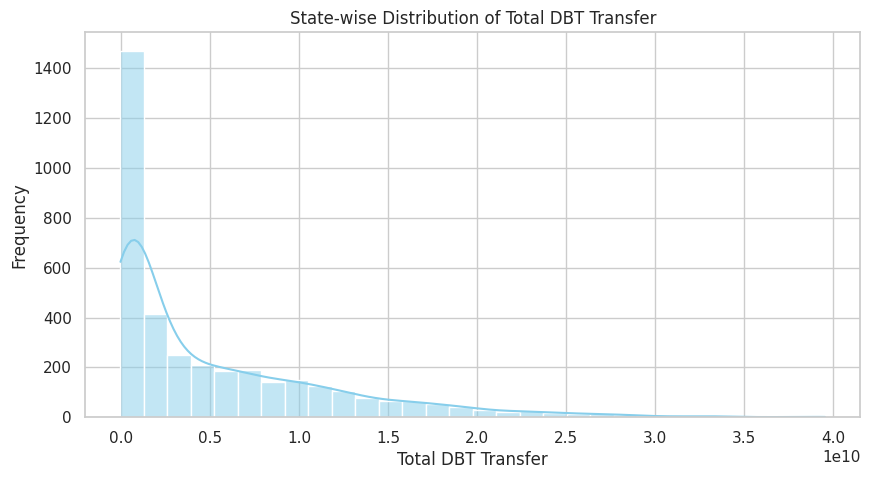

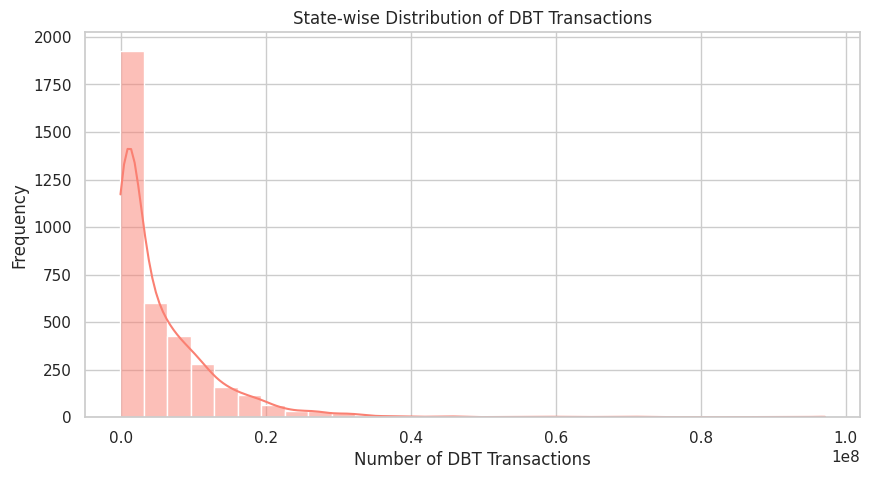

In [36]:
#State wise univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Distribution plot for total_dbt_transfer
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["total_dbt_transfer"], kde=True, bins=30, color='skyblue')
plt.title("State-wise Distribution of Total DBT Transfer")
plt.xlabel("Total DBT Transfer")
plt.ylabel("Frequency")
plt.show()

# Distribution plot for no_of_dbt_transactions
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["no_of_dbt_transactions"], kde=True, bins=30, color='salmon')
plt.title("State-wise Distribution of DBT Transactions")
plt.xlabel("Number of DBT Transactions")
plt.ylabel("Frequency")
plt.show()




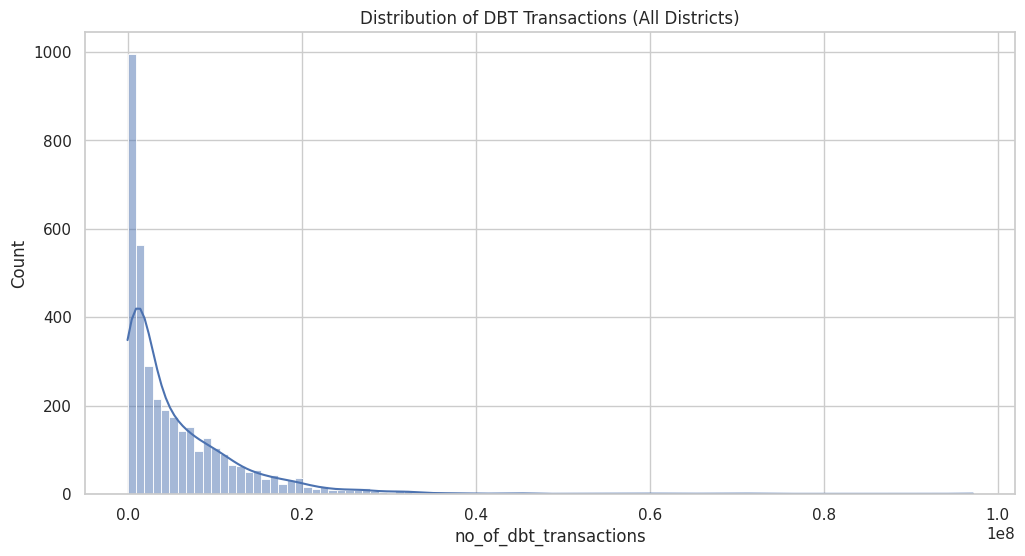

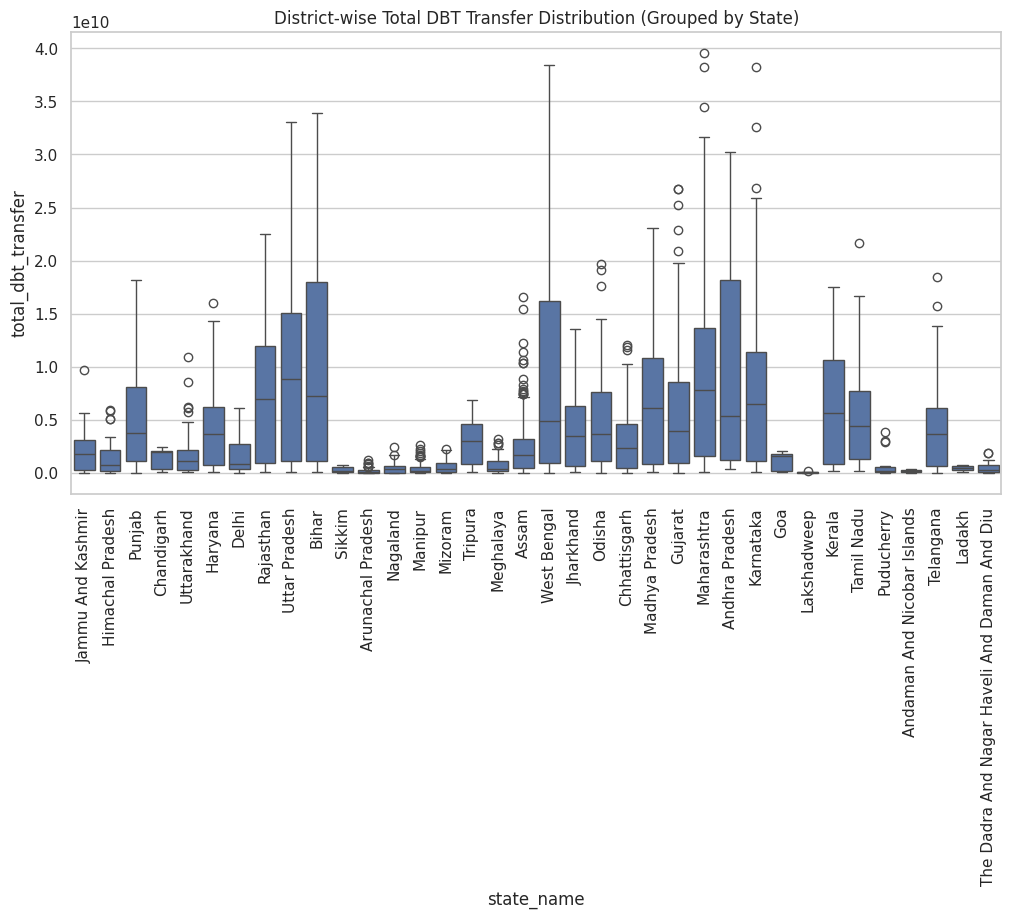

In [37]:
#District wise univariate analysis
# Histogram for number of transactions across all districts
plt.figure(figsize=(12,6))
sns.histplot(data=df_clean, x="no_of_dbt_transactions", kde=True)
plt.title("Distribution of DBT Transactions (All Districts)")
plt.show()
# Boxplot for total_dbt_transfer by district
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='state_name', y='total_dbt_transfer')
plt.xticks(rotation=90)
plt.title("District-wise Total DBT Transfer Distribution (Grouped by State)")
plt.show()



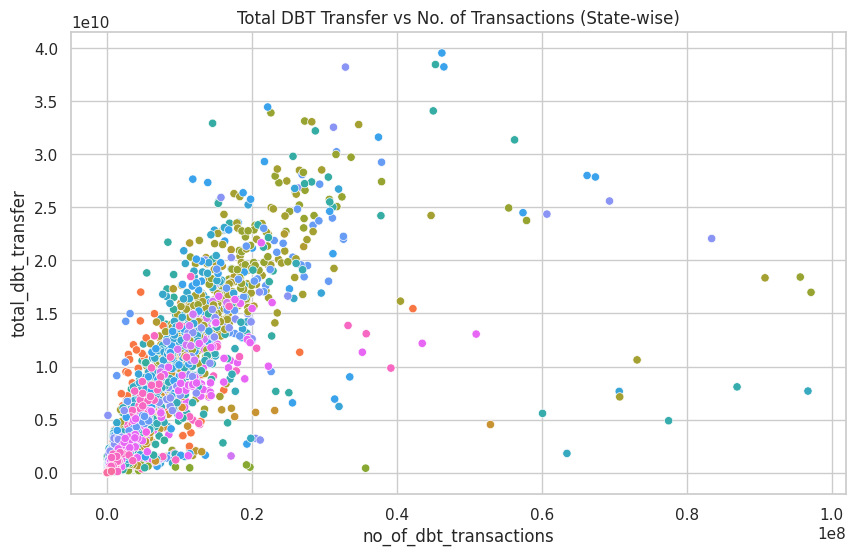

State-wise Correlation:
                         total_dbt_transfer  no_of_dbt_transactions
total_dbt_transfer                1.000000                0.985558
no_of_dbt_transactions            0.985558                1.000000


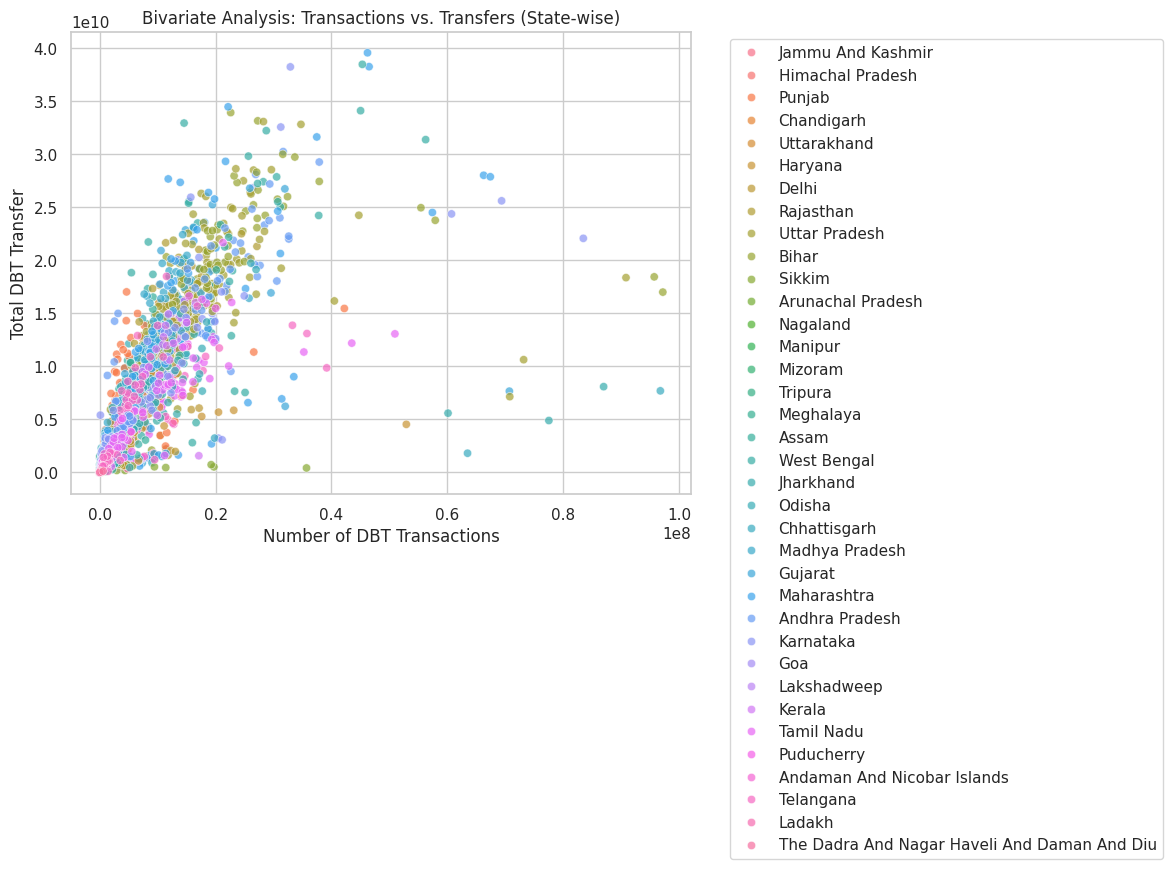

In [38]:
#State wise bivariate analysis
# Scatter plot: Total Transfer vs Number of Transactions by State
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="no_of_dbt_transactions", y="total_dbt_transfer", hue="state_name", legend=False)
plt.title("Total DBT Transfer vs No. of Transactions (State-wise)")
plt.show()

# Correlation (State level)
state_corr = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].sum().corr()
print("State-wise Correlation:\n", state_corr)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="no_of_dbt_transactions", y="total_dbt_transfer", hue="state_name", alpha=0.7)
plt.title("Bivariate Analysis: Transactions vs. Transfers (State-wise)")
plt.xlabel("Number of DBT Transactions")
plt.ylabel("Total DBT Transfer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



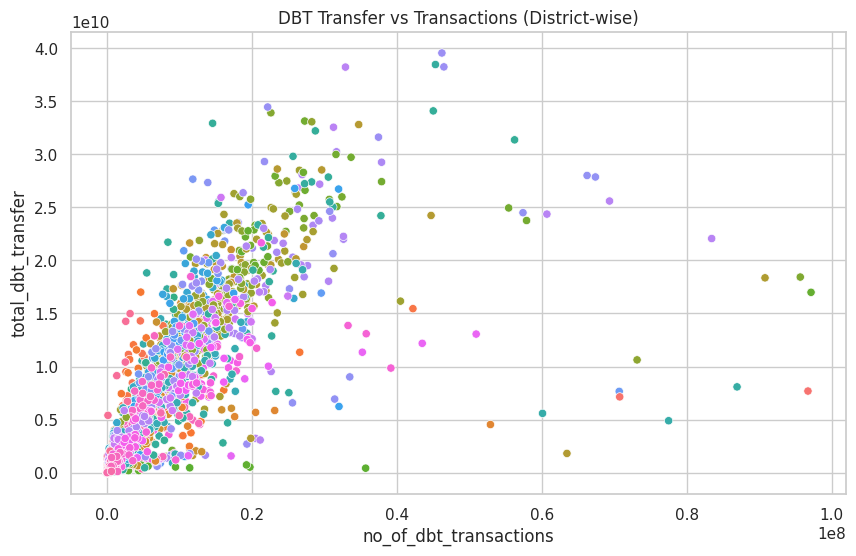

District-wise Correlation:
                         total_dbt_transfer  no_of_dbt_transactions
total_dbt_transfer                1.000000                0.806356
no_of_dbt_transactions            0.806356                1.000000


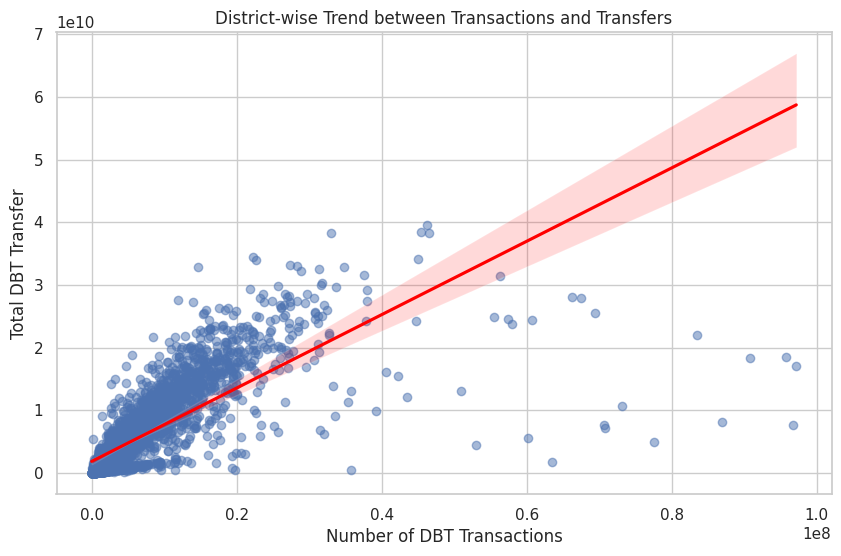

In [39]:
#District wise bivariate analysis
# District-wise Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="no_of_dbt_transactions", y="total_dbt_transfer", hue="district_name", legend=False)
plt.title("DBT Transfer vs Transactions (District-wise)")
plt.show()

# Correlation (District level)
district_corr = df_clean.groupby("district_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].sum().corr()
print("District-wise Correlation:\n", district_corr)

plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x="no_of_dbt_transactions", y="total_dbt_transfer", scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("District-wise Trend between Transactions and Transfers")
plt.xlabel("Number of DBT Transactions")
plt.ylabel("Total DBT Transfer")
plt.show()



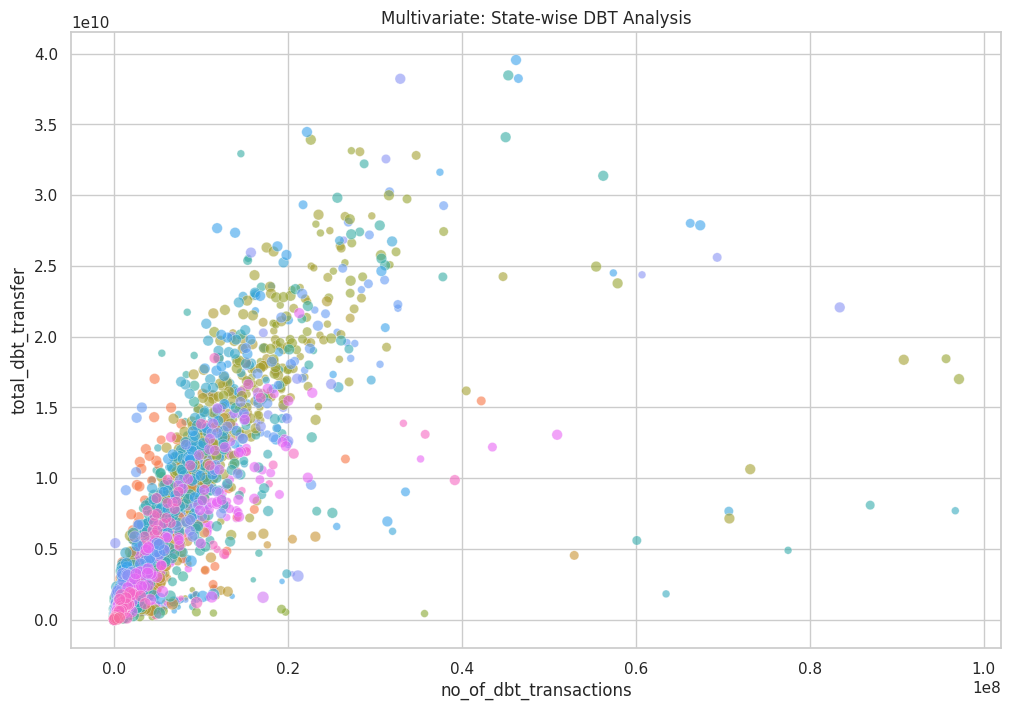

In [41]:
#State wise multivariate analysis
# Bubble plot: x = Transactions, y = Transfer, size = FY range
# Step 3: Split fy (Financial Year) into Start and End Year for df_clean as well
df_clean[["start_year", "end_year"]] = df_clean["fy"].str.split("-", expand=True).astype(int)

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_clean,
    x="no_of_dbt_transactions",
    y="total_dbt_transfer",
    size="end_year",
    hue="state_name",
    alpha=0.6,
    legend=False
)
plt.title("Multivariate: State-wise DBT Analysis")
plt.show()



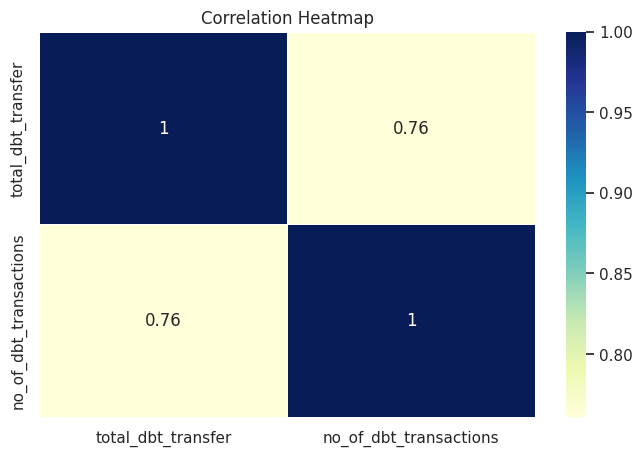

In [42]:
plt.figure(figsize=(8, 5))
corr = df_clean[["total_dbt_transfer", "no_of_dbt_transactions"]].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


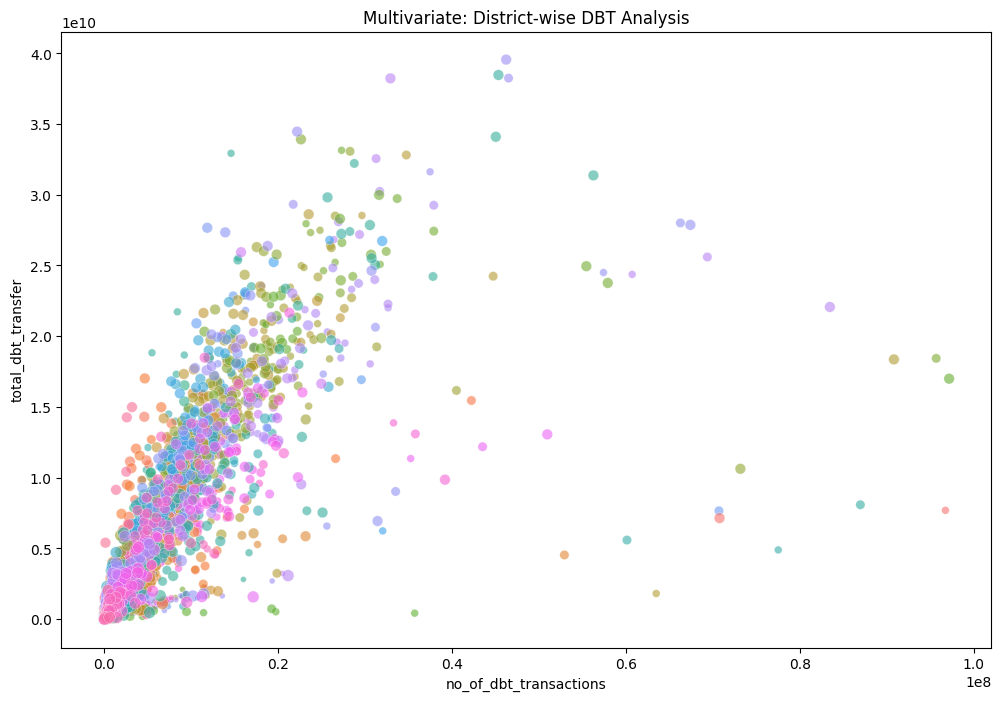

In [29]:
#District wise multivariate analysis
# Multivariate: Add financial year
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_clean,
    x="no_of_dbt_transactions",
    y="total_dbt_transfer",
    hue="district_name",
    size="start_year",
    alpha=0.6,
    legend=False
)
plt.title("Multivariate: District-wise DBT Analysis")
plt.show()


# **📊 Exploratory Data Analysis (EDA) — State-wise**


---



In [43]:
# Group by state and calculate total and average
state_summary = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].agg(["sum", "mean", "median", "max", "min"]).reset_index()
state_summary.columns = ["State", "Total_Transfer_Sum", "Avg_Transfer", "Median_Transfer", "Max_Transfer", "Min_Transfer",
                         "Total_Transactions_Sum", "Avg_Transactions", "Median_Transactions", "Max_Transactions", "Min_Transactions"]
state_summary.head()


,State,Total_Transfer_Sum,Avg_Transfer,Median_Transfer,Max_Transfer,Min_Transfer,Total_Transactions_Sum,Avg_Transactions,Median_Transactions,Max_Transactions,Min_Transactions
0,Andaman And Nicobar Islands,2.374975e+09,1.696411e+08,1.543610e+08,3.793285e+08,1209355.6,4.479560e+06,3.199686e+05,166321.5,908982.0,3691.0
1,Andhra Pradesh,9.175724e+11,1.008321e+10,5.384037e+09,3.024049e+10,365316721.3,1.073288e+09,1.179437e+07,5745546.0,37887454.0,118802.0
2,Arunachal Pradesh,1.929118e+10,1.634846e+08,9.441317e+07,1.193271e+09,0.0,1.165117e+07,9.873873e+04,55018.0,625163.0,800.0
3,Assam,4.400164e+11,2.603647e+09,1.657514e+09,1.652443e+10,9400000.0,3.142857e+08,1.859679e+06,1155543.0,9773559.0,16344.0
4,Bihar,1.872164e+12,9.853496e+09,7.274533e+09,3.391730e+10,101400000.0,2.106054e+09,1.108450e+07,7340160.5,97169422.0,258150.0


# 📌 Interpretation:

This gives a summary of DBT transactions and transfer values state-wise.

You can sort by Total_Transfer_Sum or Avg_Transfer to know top-performing states.

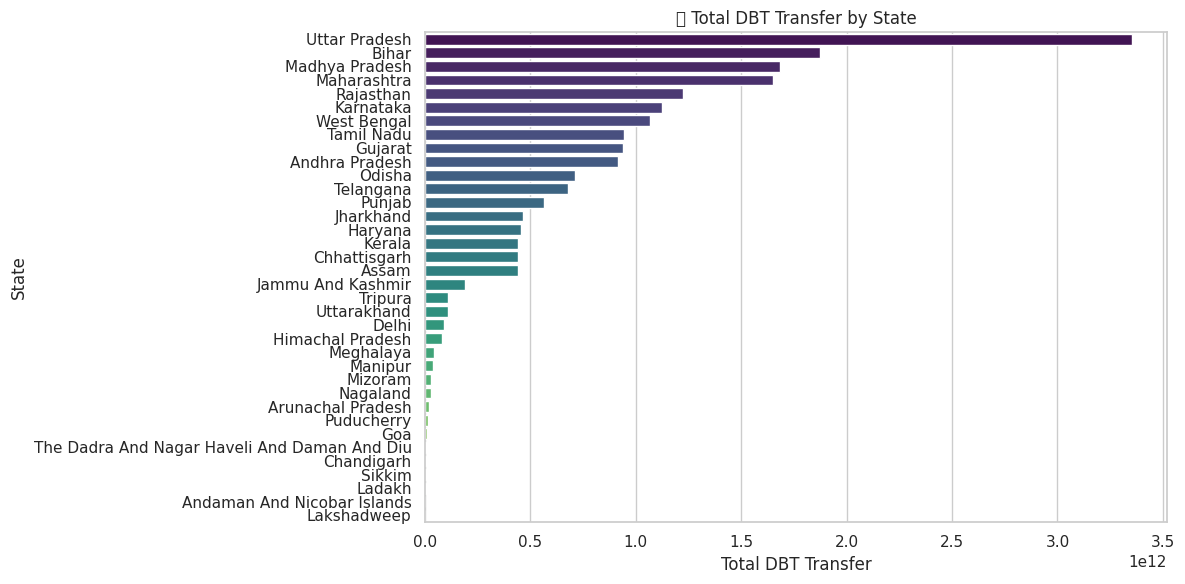

In [45]:
#State-wise Total DBT Transfer
plt.figure(figsize=(12, 6))
statewise_total = df_clean.groupby("state_name")["total_dbt_transfer"].sum().sort_values(ascending=False)
sns.barplot(x=statewise_total.values, y=statewise_total.index, palette="viridis")
plt.title("💸 Total DBT Transfer by State")
plt.xlabel("Total DBT Transfer")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# 📌 Interpretation:

This graph shows which states have received highest total DBT amounts.

Helps identify regions with maximum financial assistance.



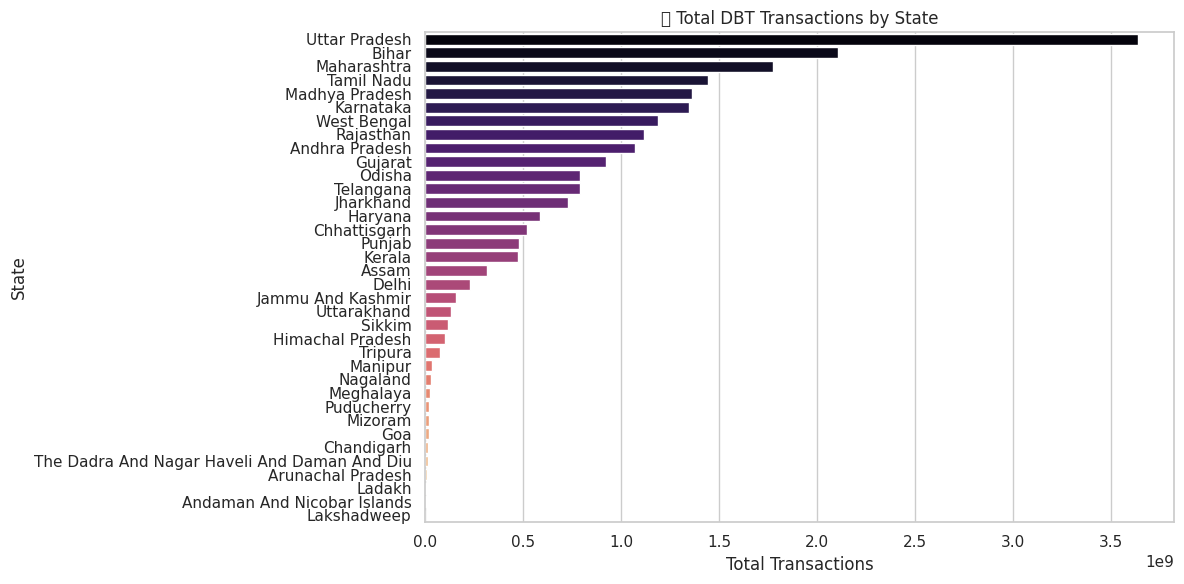

In [46]:
#State-wise Total DBT Transactions
plt.figure(figsize=(12, 6))
statewise_transactions = df_clean.groupby("state_name")["no_of_dbt_transactions"].sum().sort_values(ascending=False)
sns.barplot(x=statewise_transactions.values, y=statewise_transactions.index, palette="magma")
plt.title("📦 Total DBT Transactions by State")
plt.xlabel("Total Transactions")
plt.ylabel("State")
plt.tight_layout()
plt.show()




# 📌 Interpretation:

Shows volume of DBT activities.

Some states may have more transactions but lower transfer amounts (e.g., many small-value transfers).

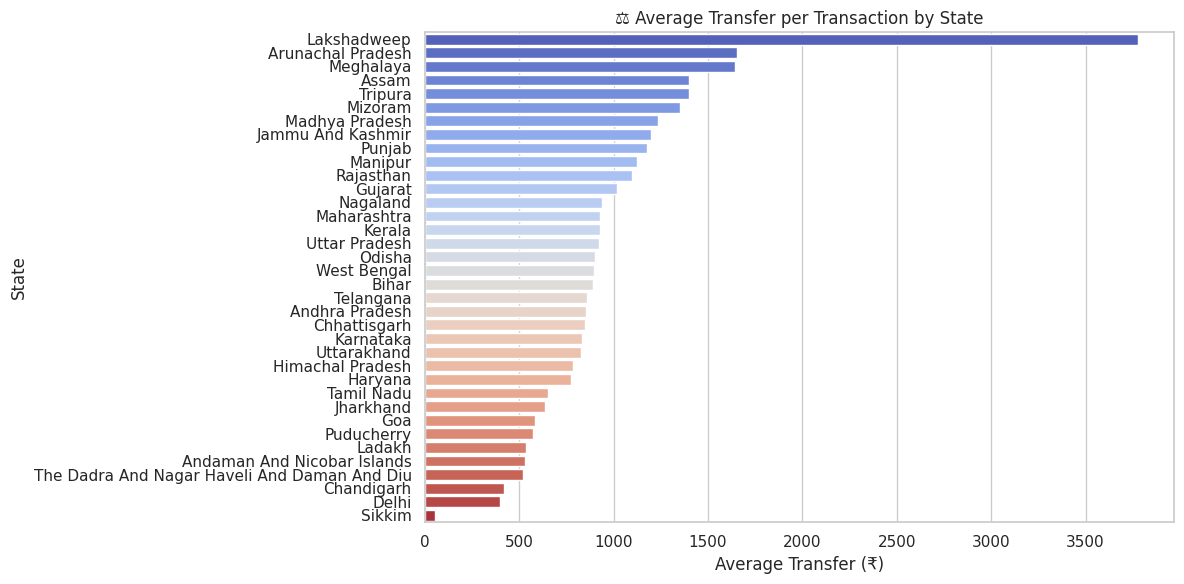

In [47]:
#Average DBT Transfer per Transaction (Efficiency Measure)
df_state_avg = df_clean.groupby("state_name").agg({
    "total_dbt_transfer": "sum",
    "no_of_dbt_transactions": "sum"
}).reset_index()

df_state_avg["avg_transfer_per_transaction"] = df_state_avg["total_dbt_transfer"] / df_state_avg["no_of_dbt_transactions"]

plt.figure(figsize=(12, 6))
sns.barplot(x="avg_transfer_per_transaction", y="state_name", data=df_state_avg.sort_values("avg_transfer_per_transaction", ascending=False), palette="coolwarm")
plt.title("⚖️ Average Transfer per Transaction by State")
plt.xlabel("Average Transfer (₹)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# 📌 Interpretation:

This shows how much money (on average) is being transferred per transaction.

Higher values may indicate larger welfare schemes or one-time payouts.



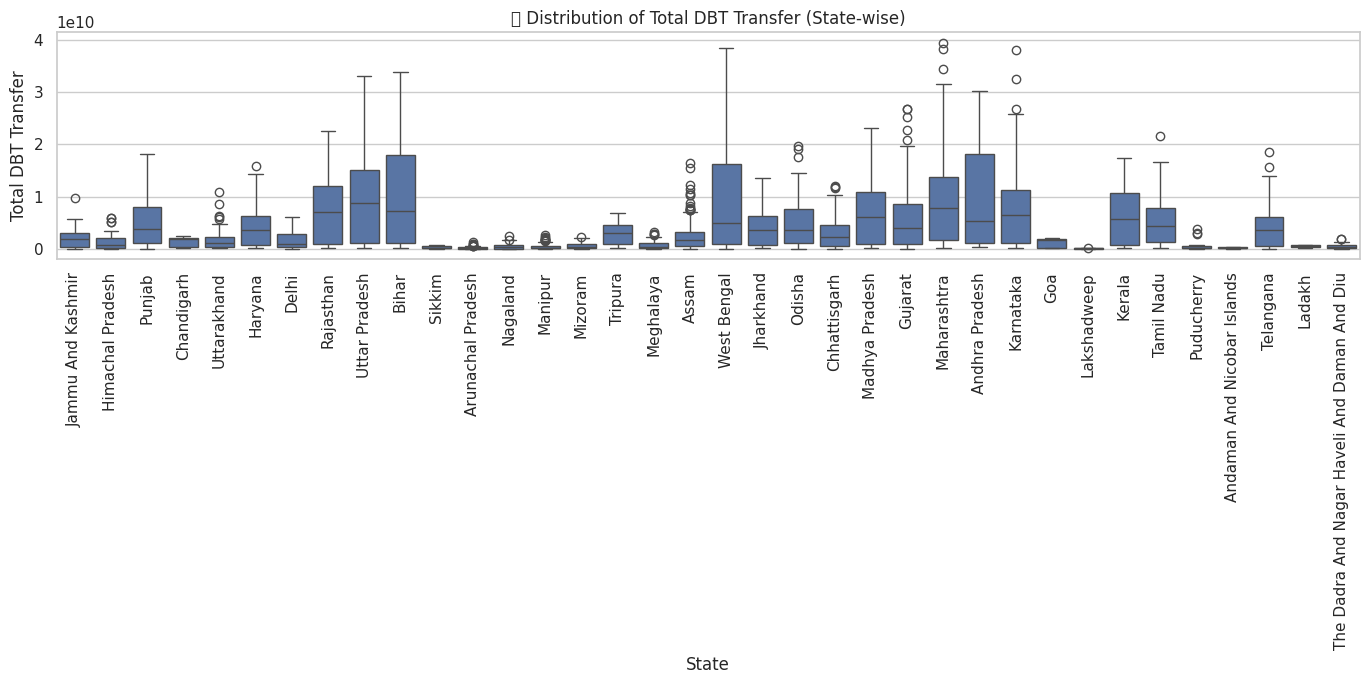

In [48]:
#State-wise Boxplot Distribution of Transfers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_clean, x="state_name", y="total_dbt_transfer")
plt.xticks(rotation=90)
plt.title("📦 Distribution of Total DBT Transfer (State-wise)")
plt.ylabel("Total DBT Transfer")
plt.xlabel("State")
plt.tight_layout()
plt.show()


# 📌 Interpretation:

Detects outliers or skewed distributions in transfer values.

Useful to check variation within each state.

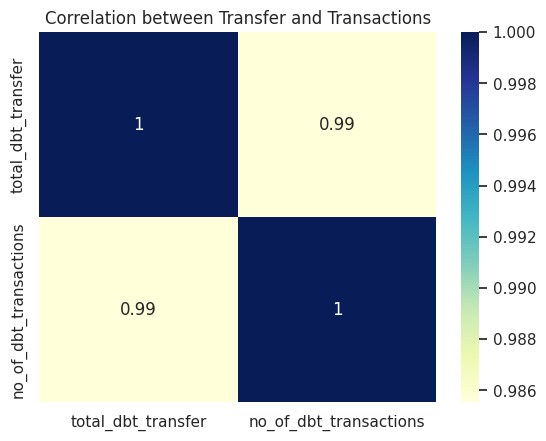

In [50]:
#Heatmap of Correlation plt.figure(figsize=(6, 4))
state_corr = df_clean.groupby("state_name")[["total_dbt_transfer", "no_of_dbt_transactions"]].sum().corr()
sns.heatmap(state_corr, annot=True, cmap='YlGnBu')
plt.title("Correlation between Transfer and Transactions")
plt.show()


# 📌 Interpretation:

Shows how strongly total DBT transfer correlates with number of transactions.

Usually, a high correlation is expected.

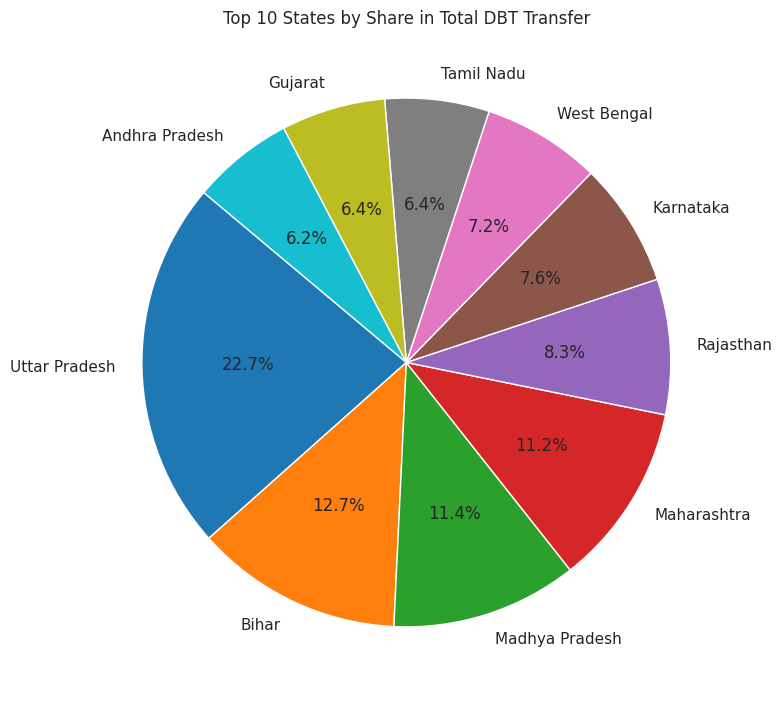

In [52]:
#Pie Chart of Share in Total DBT Transfer (Top 10 States)
top10_states = statewise_total.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top10_states.values, labels=top10_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title("Top 10 States by Share in Total DBT Transfer")
plt.tight_layout()
plt.show()


# 📌 Interpretation:

Gives quick % share of DBT burden across leading states.



In [54]:
#Highlight Top & Bottom States (Tabular)
top_states = statewise_total.head(5)
bottom_states = statewise_total.tail(5)

print("Top 5 States by Total DBT Transfer:\n", top_states)
print("\n Bottom 5 States by Total DBT Transfer:\n", bottom_states)


Top 5 States by Total DBT Transfer:
 state_name
Uttar Pradesh     3.351545e+12
Bihar             1.872164e+12
Madhya Pradesh    1.682264e+12
Maharashtra       1.652015e+12
Rajasthan         1.222386e+12
Name: total_dbt_transfer, dtype: float64

 Bottom 5 States by Total DBT Transfer:
 state_name
Chandigarh                     6.807253e+09
Sikkim                         6.351699e+09
Ladakh                         3.602620e+09
Andaman And Nicobar Islands    2.374975e+09
Lakshadweep                    3.006458e+08
Name: total_dbt_transfer, dtype: float64


# District-wise Exploratory Data Analysis (EDA)

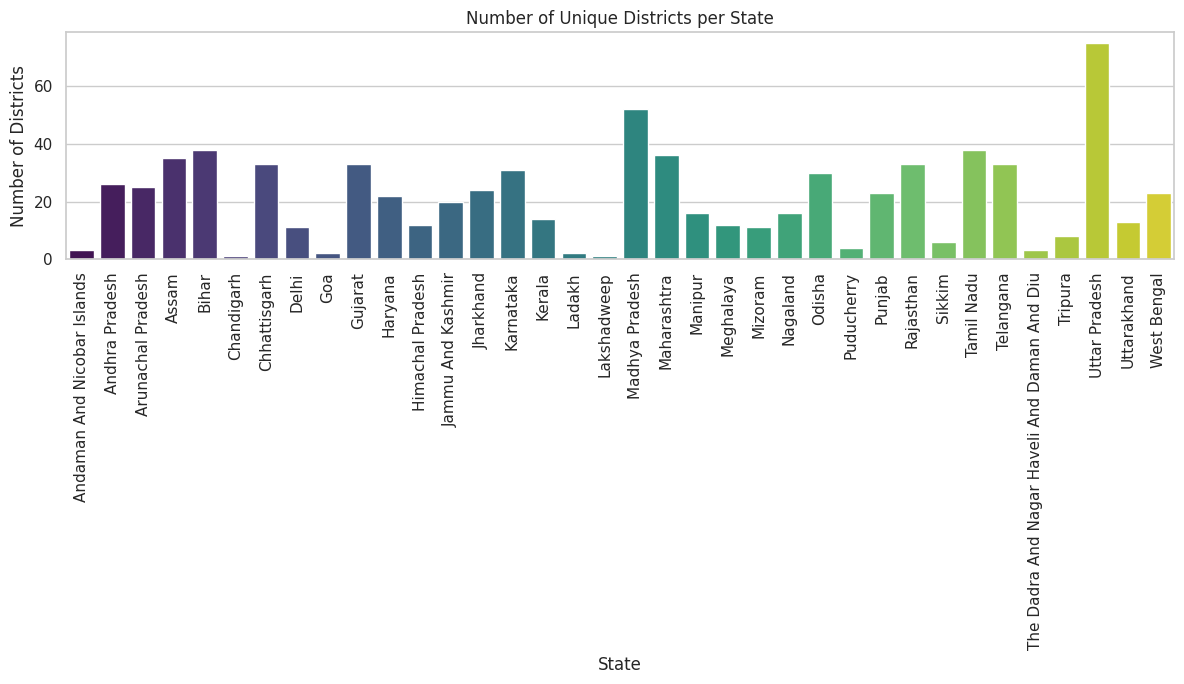

In [59]:
#1. District-wise Count of Records per State
district_counts = df_clean.groupby("state_name")["district_name"].nunique()

plt.figure(figsize=(12, 7))
sns.barplot(x=district_counts.index, y=district_counts.values, palette="viridis")
plt.title("Number of Unique Districts per State")
plt.xlabel("State")
plt.ylabel("Number of Districts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

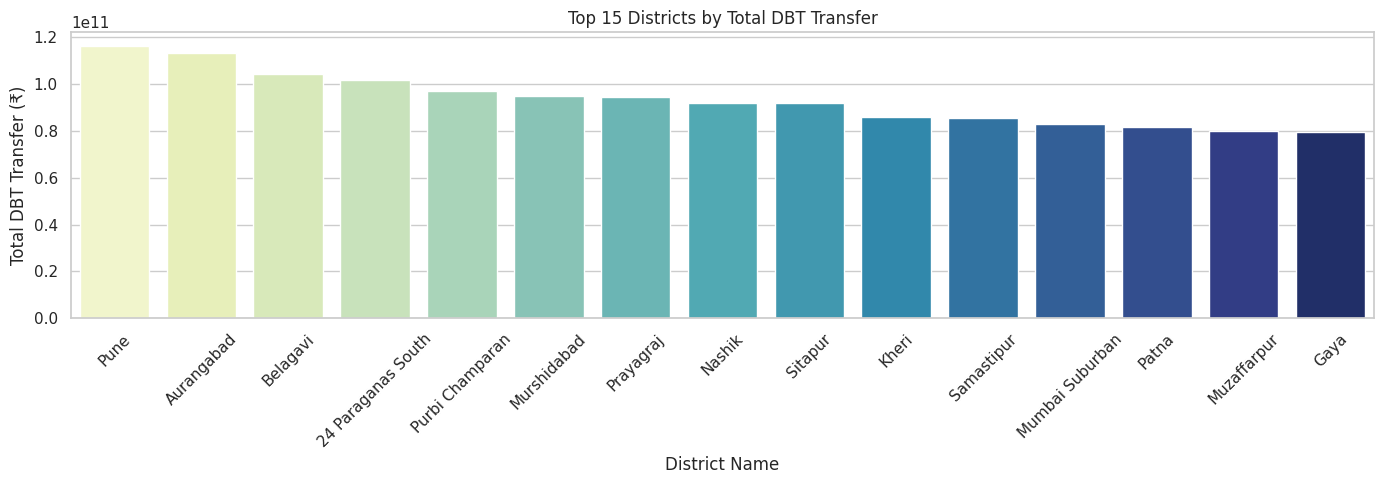

In [61]:
#2. Total DBT Transfer Amount per District
district_total_transfer = df_clean.groupby('district_name')['total_dbt_transfer'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(14, 5))
sns.barplot(x=district_total_transfer.index, y=district_total_transfer.values, palette='YlGnBu')
plt.title('Top 15 Districts by Total DBT Transfer')
plt.xlabel('District Name')
plt.ylabel('Total DBT Transfer (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


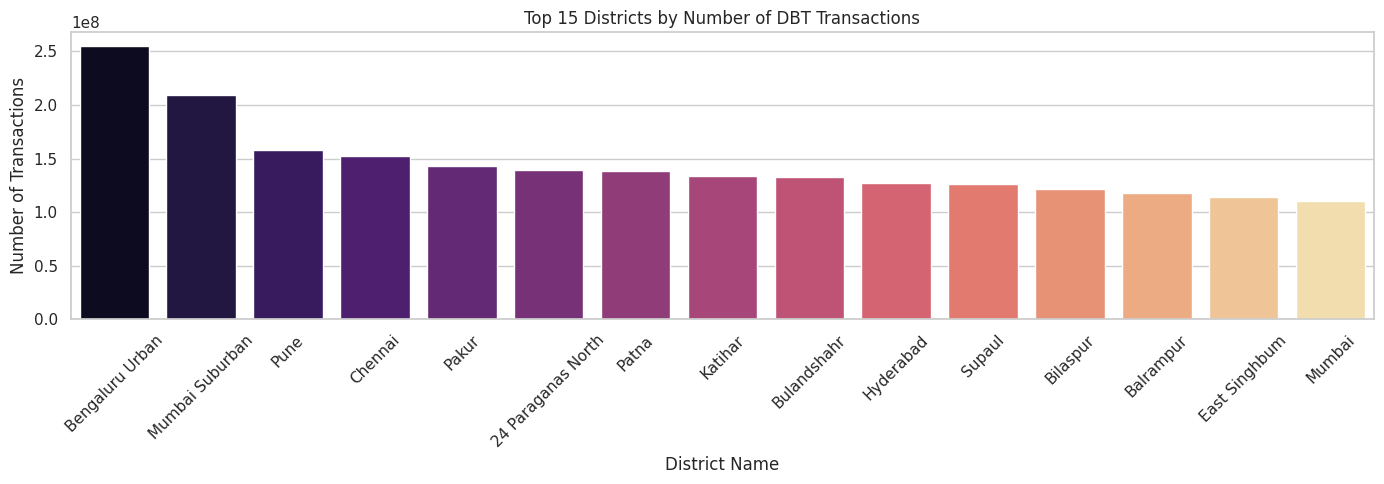

In [62]:
#3.Total Number of DBT Transactions per District

district_total_txn = df_clean.groupby('district_name')['no_of_dbt_transactions'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(14, 5))
sns.barplot(x=district_total_txn.index, y=district_total_txn.values, palette='magma')
plt.title('Top 15 Districts by Number of DBT Transactions')
plt.xlabel('District Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

These districts have the most DBT activity.

A higher count may indicate frequent disbursements, better implementation, or more schemes.

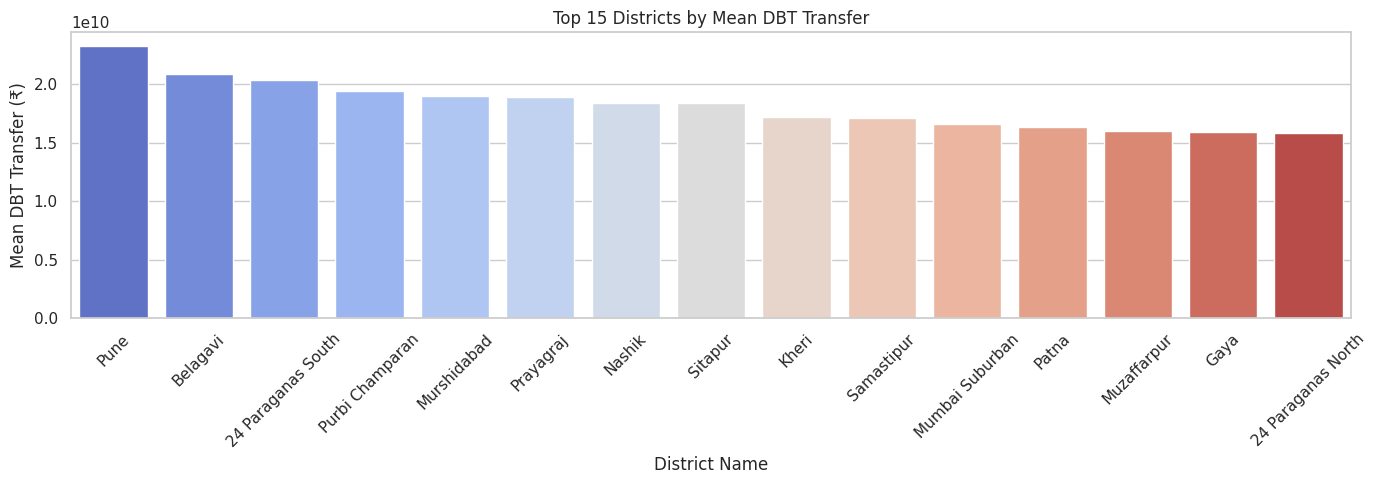

In [63]:
#4. Mean DBT Transfer per District

district_mean_transfer = df_clean.groupby('district_name')['total_dbt_transfer'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(14, 5))
sns.barplot(x=district_mean_transfer.index, y=district_mean_transfer.values, palette='coolwarm')
plt.title('Top 15 Districts by Mean DBT Transfer')
plt.xlabel('District Name')
plt.ylabel('Mean DBT Transfer (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

These districts received higher average transfer amounts per record, possibly indicating higher-value schemes or fewer but larger transactions.

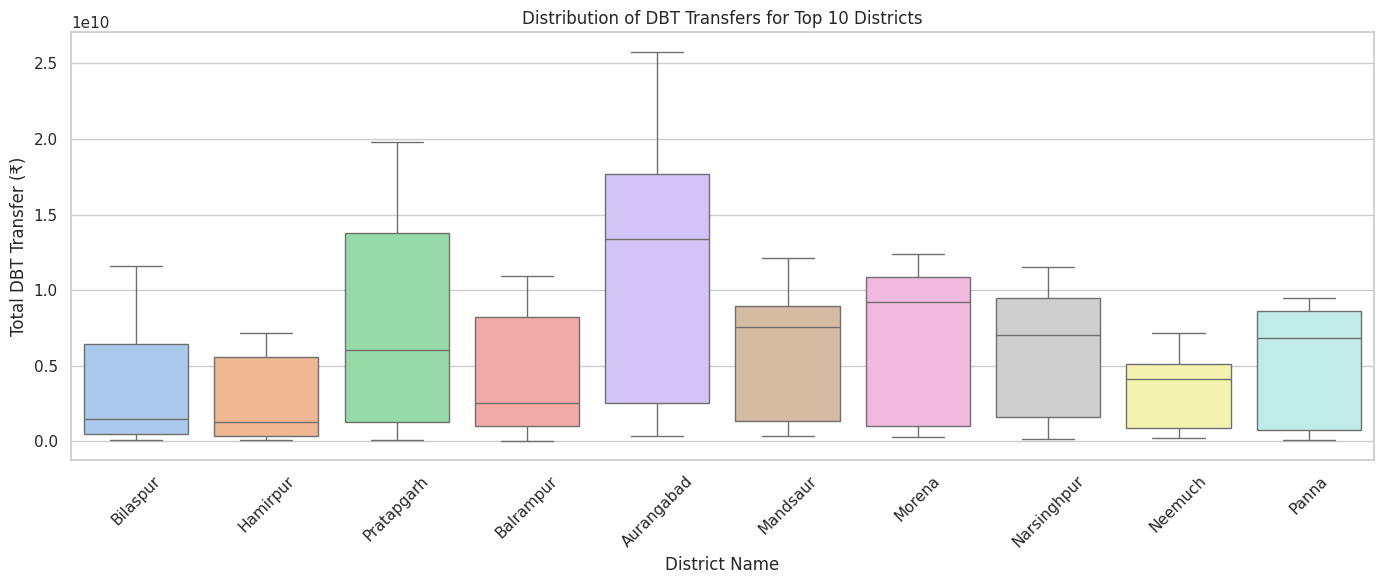

In [64]:
#5. Boxplot of DBT Transfer Distribution by District

top_districts_box = df_clean['district_name'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[df_clean['district_name'].isin(top_districts_box)],
            x='district_name', y='total_dbt_transfer', palette='pastel')
plt.title('Distribution of DBT Transfers for Top 10 Districts')
plt.xlabel('District Name')
plt.ylabel('Total DBT Transfer (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

This helps to spot outliers and variability in transfer amounts within top districts.

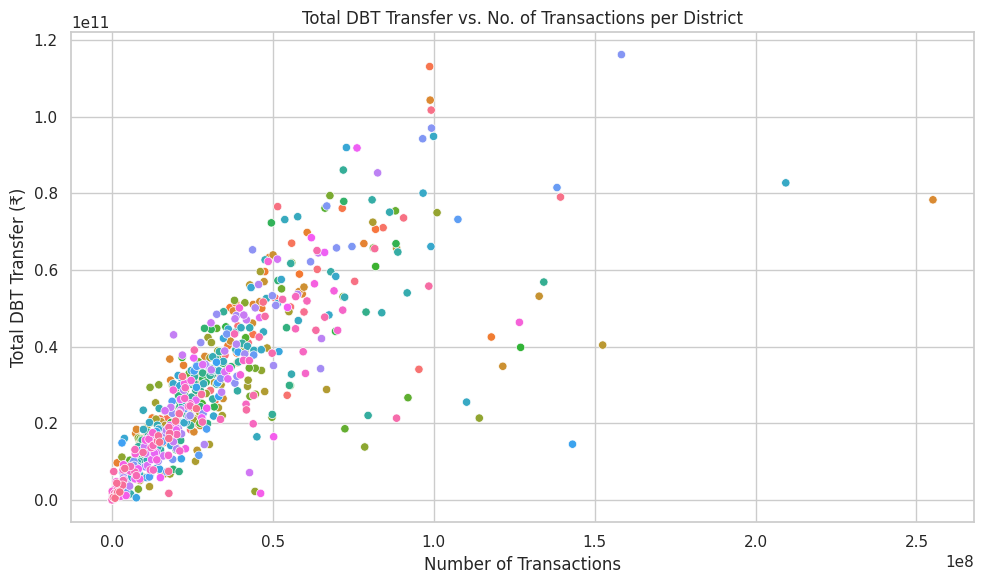

In [65]:
#6. Scatter Plot: Total Transfer vs. Number of Transactions per District

district_grouped = df_clean.groupby('district_name')[['total_dbt_transfer', 'no_of_dbt_transactions']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_grouped, x='no_of_dbt_transactions', y='total_dbt_transfer', hue='district_name', legend=False)
plt.title('Total DBT Transfer vs. No. of Transactions per District')
plt.xlabel('Number of Transactions')
plt.ylabel('Total DBT Transfer (₹)')
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

Shows whether districts with more transactions also have higher total transfers. Helps identify inefficiencies or outliers.

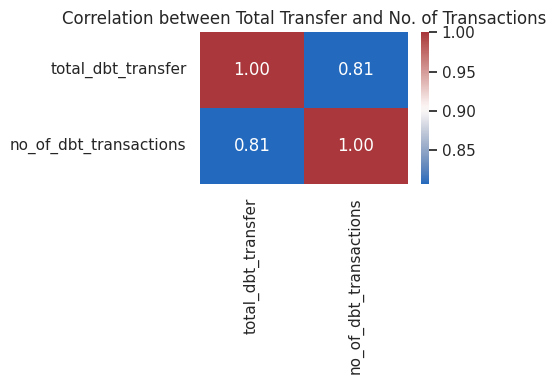

In [66]:
#7. Correlation Heatmap (District-level Aggregates)

plt.figure(figsize=(5, 4))
sns.heatmap(district_grouped[['total_dbt_transfer', 'no_of_dbt_transactions']].corr(), annot=True, cmap='vlag', fmt=".2f")
plt.title('Correlation between Total Transfer and No. of Transactions')
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

A strong positive correlation would indicate that as number of transactions increase, the total transfer amount also increases.



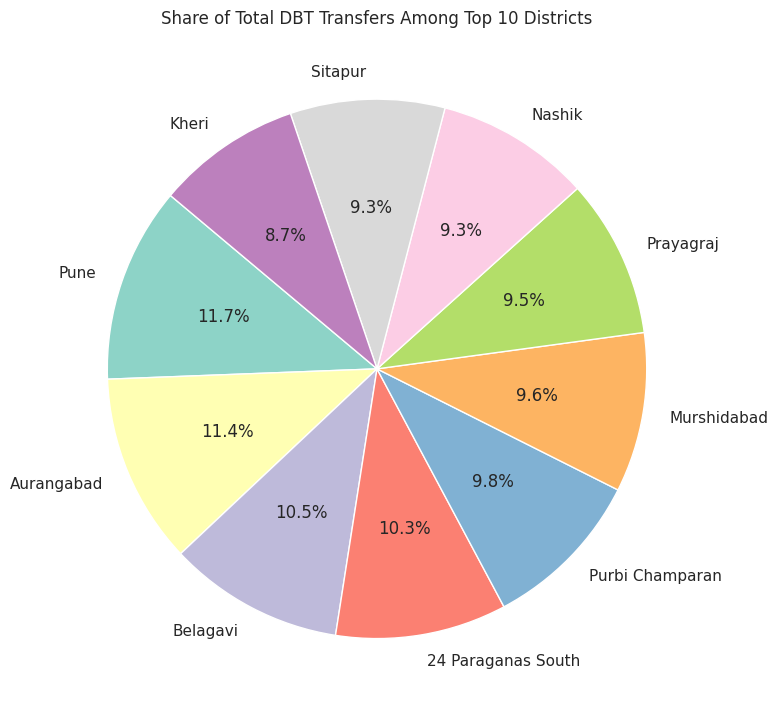

In [67]:
#8. Pie Chart: Share of Total Transfer Among Top 10 Districts

top10 = district_total_transfer.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Share of Total DBT Transfers Among Top 10 Districts')
plt.tight_layout()
plt.show()

# 🧠 Interpretation:

Visualizes concentration of benefits- whether a few districts dominate the total DBT transfer.